# Implementation Lineare Regression und Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

## Schritt 1: Daten sammeln (hier generieren)

In [2]:
num_datapoints = 2000

# Generiere num_datapoints Zufallszahlen zwischen 0 und 10
rng = np.random.default_rng(0)
x = rng.uniform(0,10,num_datapoints)

# Erzeuge y = m*x+b
m = 4
b = 1.5

y_lin = m*x+b

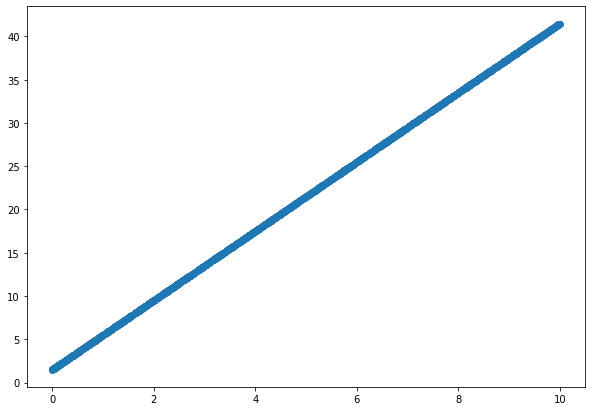

In [3]:
plt.figure(figsize=(10,7))
plt.plot(x, y_lin, 'o');

In [4]:
# Addiere Zufallszahl zu y
y = y_lin + rng.normal(0,2.0,num_datapoints)

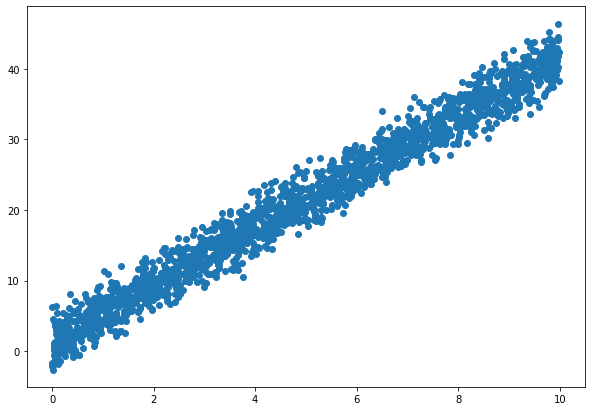

In [5]:
plt.figure(figsize=(10,7))
plt.plot(x, y, 'o');

## Schritt 2: Daten aufbereiten

In [6]:
# Aufteilung in Traings- und Testdaten (80:20)
split_value = int(0.8*num_datapoints)

training_data = np.array(x[0:split_value-1])
test_data_x = np.array(x[split_value:])
test_data_y = np.array(y[split_value:])

In [7]:
# Aufteilung in k-Folds
kf = KFold(n_splits=3)
for train_index, val_index in kf.split(training_data):
    print("Train first index", train_index[0], ", last index:", train_index[-1])
    print("Val first index", val_index[0], ", last index:", val_index[-1])

Train first index 533 , last index: 1598
Val first index 0 , last index: 532
Train first index 0 , last index: 1598
Val first index 533 , last index: 1065
Train first index 0 , last index: 1065
Val first index 1066 , last index: 1598


## Schritt 3: Model trainieren

### Kostenfunktion:

$$f(\bar{\theta}) = \frac{1}{2m} \sum_{k=1}^m (\theta_0 + \theta_1 x_{k} - y_k)^2$$

In [8]:
def cost_function(theta, x, y):
    return sum(pow(theta[0]+theta[1]*x-y,2))/2/len(x)

print("Cost function value perfect data:", cost_function(np.array([b, m]), x, y_lin))
print("Cost function value rng data:", cost_function(np.array([b, m]), x, y))

Cost function value perfect data: 0.0
Cost function value rng data: 1.9880660937918881


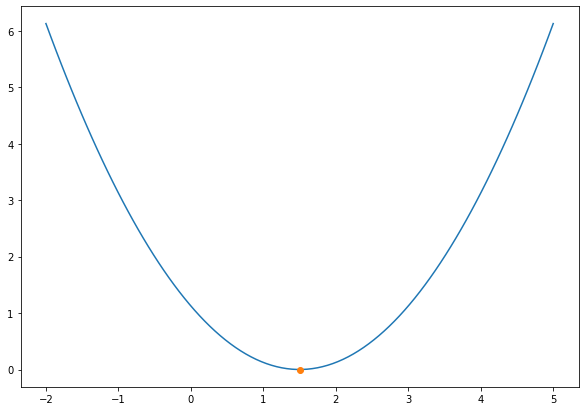

In [9]:
theta_0_plot = np.linspace(-2, 5, 100)
y_plot = np.empty([100,1])
for theta_0, i in zip(theta_0_plot, range(0,100)):
    y_plot[i] = cost_function([theta_0, m], x, y_lin)

plt.figure(figsize=(10,7))
plt.plot(theta_0_plot, y_plot);
plt.plot(b, 0, 'o');

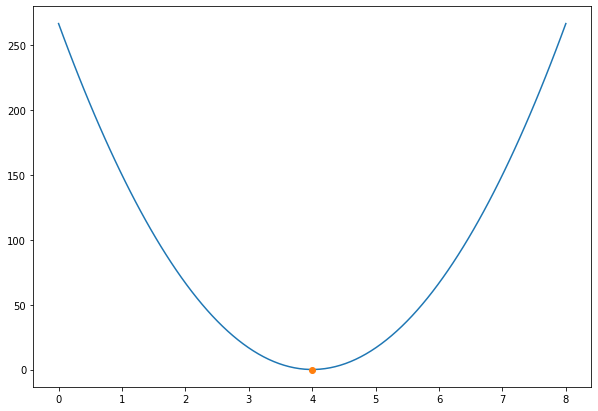

In [10]:
theta_1_plot = np.linspace(0, 8, 100)
y_plot = np.empty([100,1])
for theta_1, i in zip(theta_1_plot, range(0,100)):
    y_plot[i] = cost_function([b, theta_1], x, y_lin)

plt.figure(figsize=(10,7))
plt.plot(theta_1_plot, y_plot);
plt.plot(m, 0, 'o');

### Gradient der Kostenfunktion:

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{k=1}^m (\theta_0 + \theta_1 x_k-y_k)$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{k=1}^m (\theta_0 + \theta_1 x_k-y_k)x_k$$

In [11]:
def grad_cost_function_theta0(theta, x, y):
    return sum(theta[0]+theta[1]*x-y)/len(x)

def grad_cost_function_theta1(theta, x, y):
    return sum(np.multiply(theta[0]+theta[1]*x-y, x))/len(x)

print("Grad cost function value theta_0:",grad_cost_function_theta0(np.array([b, m]), x, y_lin))
print("Grad cost function value theta_1:",grad_cost_function_theta1(np.array([b, m]), x, y_lin))

Grad cost function value theta_0: 0.0
Grad cost function value theta_1: 0.0


### Gradient Descent:

$$\theta_{j, i+1} = \theta_{j, i} - \alpha \frac{\partial J}{\partial \theta_j}(\bar{\theta_i})$$

* j: Dimension des Parameter theta (0 und 1)
* i: Iterationschritt
* alpha: Lernrate

In [12]:
def gradient_descent(x, y, theta_start=np.array([0.0, 0.0]), learn_rate=0.03, tol=1e-5, max_iters=1e4):
    
    current_iter = 0
    theta = theta_start
    previous_step_size = 1e5

    while previous_step_size > tol and current_iter < max_iters:
        theta_old = np.array(theta)
        
        theta[0] = theta_old[0] - learn_rate*grad_cost_function_theta0(theta_old, x, y)
        theta[1] = theta_old[1] - learn_rate*grad_cost_function_theta1(theta_old, x, y)
        
        current_iter = current_iter + 1
        previous_step_size = np.linalg.norm(theta - theta_old)

    print("Anzahl Iterationen: ", current_iter)
    
    return theta

In [13]:
print("Ergebnis Gradient Descent:", gradient_descent(x, y_lin))

Anzahl Iterationen:  871
Ergebnis Gradient Descent: [1.49868403 4.00019838]


In [14]:
theta_opt = []
run = 0;

for train_index, val_index in kf.split(training_data):
    x_train, x_val = training_data[train_index], training_data[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    theta = np.array(gradient_descent(x_train, y_train))
    theta_opt.append(theta)
        
    print("Run:", run) 
    print("Theta opt:", theta)
    print("Kostenfunktion Theta opt:", cost_function(theta, x_train, y_train))
    print("Kostenfunktion m und b:  ", cost_function(np.array([b,m]), x_train, y_train))
    print("")
    
    run = run + 1

Anzahl Iterationen:  455
Run: 0
Theta opt: [1.45975162 4.00439644]
Kostenfunktion Theta opt: 2.0286844167308096
Kostenfunktion m und b:   2.028949526952682

Anzahl Iterationen:  157
Run: 1
Theta opt: [1.46264143 4.00406346]
Kostenfunktion Theta opt: 2.042009075041762
Kostenfunktion m und b:   2.0422035183324905

Anzahl Iterationen:  637
Run: 2
Theta opt: [1.5774688  3.97206341]
Kostenfunktion Theta opt: 1.943567320968956
Kostenfunktion m und b:   1.9489312536930739



## Schritt 4: Model auswerten

Run: 0
Kostenfunktion Theta opt: 1.962341389943261
Kostenfunktion m und b:   1.9621852450728852

Run: 1
Kostenfunktion Theta opt: 1.9356615796515355
Kostenfunktion m und b:   1.935677262313267

Run: 2
Kostenfunktion Theta opt: 2.138154926288893
Kostenfunktion m und b:   2.1222217915920902



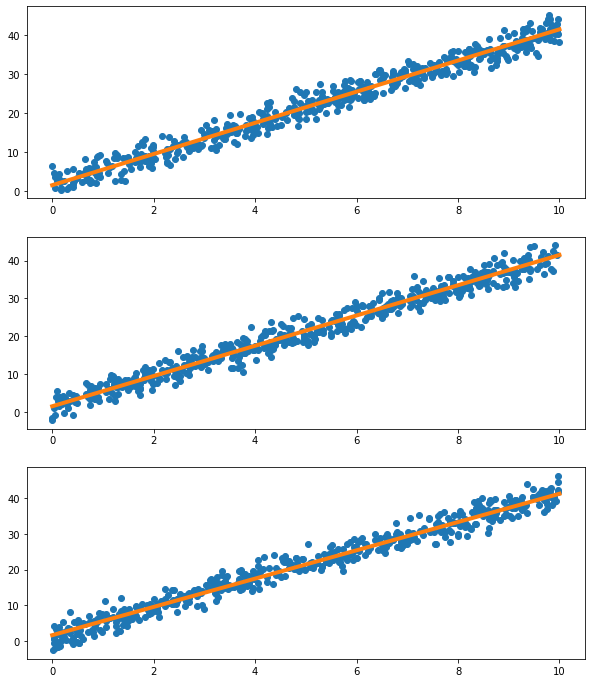

In [15]:
fig, axs = plt.subplots(3,figsize=(10,12))

run = 0;

for train_index, val_index in kf.split(training_data):
    x_train, x_val = training_data[train_index], training_data[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    x_plot = np.linspace(0,10,10)
    y_plot = theta_opt[run][0] + x_plot*theta_opt[run][1]
    
    axs[run].plot(x_val, y_val, 'o')
    axs[run].plot(x_plot, y_plot, linewidth=4)
    
    print("Run:", run)
    print("Kostenfunktion Theta opt:", cost_function(theta_opt[run], x_val, y_val))
    print("Kostenfunktion m und b:  ",cost_function(np.array([b,m]), x_val, y_val))
    print("")
    
    run = run + 1

## Schritt 5: Parametertuning

Beispielhaft: Wiederholung von Schritt 3 mit verringerter Lernrate

In [16]:
for train_index, val_index in kf.split(training_data):
    x_train, x_val = training_data[train_index], training_data[val_index]
    y_train, y_val = y[train_index], y[val_index]
       
    theta = gradient_descent(x_train, y_train, learn_rate=0.015)
    print(theta)
    print(cost_function(theta, x_train, y_train))
    print(cost_function(np.array([b,m]), x_train, y_train))

Anzahl Iterationen:  1021
[1.46107062 4.00419682]
2.028685078816227
2.028949526952682
Anzahl Iterationen:  19
[1.4612784  4.00426399]
2.0420097578606144
2.0422035183324905
Anzahl Iterationen:  1077
[1.57603324 3.97227867]
1.943568041750513
1.9489312536930739


## Schritt 6: Testdaten

Anzahl Iterationen:  560
Kostenfunktion m and b:   1.9174055498017315
Kostenfunktion Theta opt: 1.9219081980630532


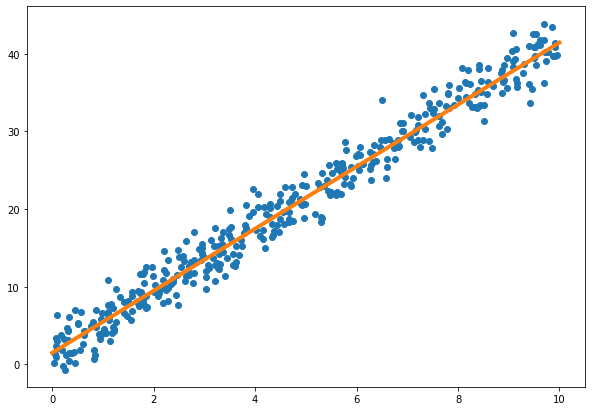

In [17]:
training_data_y = np.array(y[0:split_value-1])
theta = gradient_descent(training_data, training_data_y)

print("Kostenfunktion m and b:  ", cost_function(np.array([b,m]), test_data_x, test_data_y))
print("Kostenfunktion Theta opt:", cost_function(theta, test_data_x, test_data_y))

x_plot = np.linspace(0,10,10)
y_plot = theta[0] + x_plot*theta[1]

plt.figure(figsize=(10,7))
plt.plot(test_data_x, test_data_y, 'o');
plt.plot(x_plot, y_plot, linewidth=4);